In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
# import mnist
from tensorflow.keras.datasets import mnist


In [3]:
# loading the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

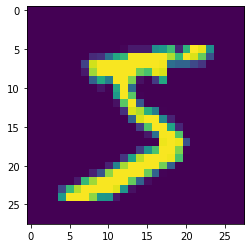

In [4]:
plt.imshow(x_train[0])

In [5]:
y_train[0]

5

In [6]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [7]:
x_train.min(), x_train.max()

(0, 255)

In [8]:
y_train.min(), y_train.max()

(0, 9)

In [9]:
# normalizing the images
x_train = x_train / 255.0
x_test = x_test / 255.0

In [10]:
x_train.min(), x_train.max()

(0.0, 1.0)

In [11]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [12]:
# reshaping the images
# the convolution class with take image in 3D
# since here 60000 images are in shape of 28*28 i.e 2D
# converting it to 3D
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28,28, 1)
# x_train = np.expand_dims(x_train, axis=-1)
# x_test = np.expand_dims(x_test, axis=-1)


In [13]:
input_shape = x_train[0].shape

In [14]:
input_shape

(28, 28, 1)

# Building the Model

In [15]:
model = tf.keras.models.Sequential()

In [16]:
# adding the first CNN layer
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape))

In [17]:
# adding second CNN layer
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'))

In [18]:
# adding maxpool layer
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

In [19]:
# adding dropout layer
# this will avoid overfitting
model.add(tf.keras.layers.Dropout(rate=0.4))

In [20]:
# adding flatten layer
model.add(tf.keras.layers.Flatten())

In [21]:
# fully connected layer
model.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [22]:
# output layer
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))


In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

In [24]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

# Training the model

In [35]:
history = model.fit(x_train, y_train, epochs=3, batch_size=128, verbose=1, validation_data=(x_test, y_test))

Epoch 1/3
469/469 [==============================] - 86s 183ms/step - loss: 0.0270 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.0354 - val_sparse_categorical_accuracy: 0.9896
Epoch 2/3
469/469 [==============================] - 85s 180ms/step - loss: 0.0214 - sparse_categorical_accuracy: 0.9932 - val_loss: 0.0356 - val_sparse_categorical_accuracy: 0.9871
Epoch 3/3
469/469 [==============================] - 89s 191ms/step - loss: 0.0171 - sparse_categorical_accuracy: 0.9944 - val_loss: 0.0343 - val_sparse_categorical_accuracy: 0.9897


In [36]:
# model prediction
y_pred = model.predict(x_test)  
y_pred = np.argmax(y_pred, axis=1)

313/313 [==============================] - 405s 1s/step


In [37]:
y_pred, y_test

(array([7, 2, 1, ..., 4, 5, 6], dtype=int64),
 array([7, 2, 1, ..., 4, 5, 6], dtype=uint8))

In [38]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 978    0    0    1    0    0    1    0    0    0]
 [   0 1131    1    1    0    1    1    0    0    0]
 [   1    2 1023    1    0    0    1    4    0    0]
 [   0    0    0 1006    0    3    0    0    1    0]
 [   0    0    0    0  978    0    3    0    0    1]
 [   1    0    0    9    0  878    2    0    1    1]
 [   6    2    0    0    1    1  946    0    2    0]
 [   0    4    6    0    0    0    0 1014    1    3]
 [   5    1    3    0    1    0    1    1  959    3]
 [   0    4    0    4   10    1    0    4    2  984]]


In [39]:
accuracy_score(y_test, y_pred)

0.9897

# Learning Curve

In [40]:
def learning_curve(history, epoch):
    
    # training vs validation accuracy
    epoch_range = range(1, epoch+1)
    plt.plot(epoch_range, history.history['sparse_categorical_accuracy'])
    plt.plot(epoch_range, history.history['val_sparse_categorical_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

    # training vs validation loss
    plt.plot(epoch_range, history.history['loss'])
    plt.plot(epoch_range, history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

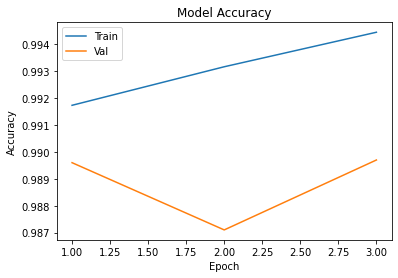

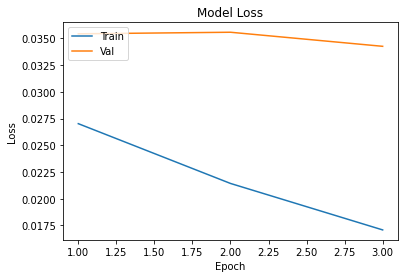

In [41]:
learning_curve(history, 3)